<a href="https://colab.research.google.com/github/LujainOwaimer/Exercises/blob/main/Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

In [1]:
import re
import pandas as pd



import nltk
nltk.download('punkt')


import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, Bidirectional, SimpleRNN, LSTM

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Download the Dataset

In [2]:
!kaggle datasets download -d khaledzsa/spam-messages
!unzip spam-messages.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/spam-messages
License(s): unknown
  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 79.5MB/s]
Archive:  spam-messages.zip
  inflating: spam.csv                


# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [4]:
# Load the CV dataset
df = pd.read_csv('/content/spam.csv')

print(df.isnull().sum())
print(df.duplicated().sum())

# Display the first few rows
df.head()


text     0
label    0
dtype: int64
183


,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.sample()

,text,label
1095,Ryder unsold.now gibbs. https://link1.com,ham


In [7]:
df_cleaned = df.drop_duplicates()

print(df_cleaned.duplicated().sum())

0


In [8]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


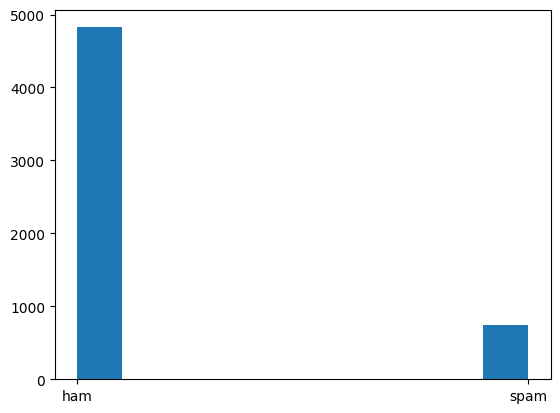

In [9]:
plt.hist(df['label'])
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer


X = df['text']
y = df['label']


#y = y.map({'ham': 0, 'spam': 1})


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


balanced_df = pd.DataFrame(X_resampled.toarray())
balanced_df['label'] = y_resampled


print(balanced_df['label'].value_counts())

label
ham     4825
spam    4825
Name: count, dtype: int64


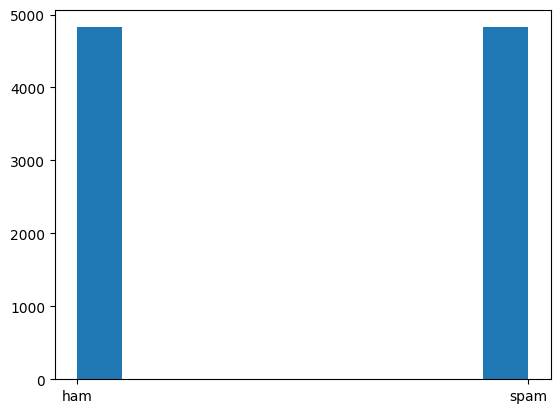

In [12]:
plt.hist(balanced_df['label'])
plt.show()

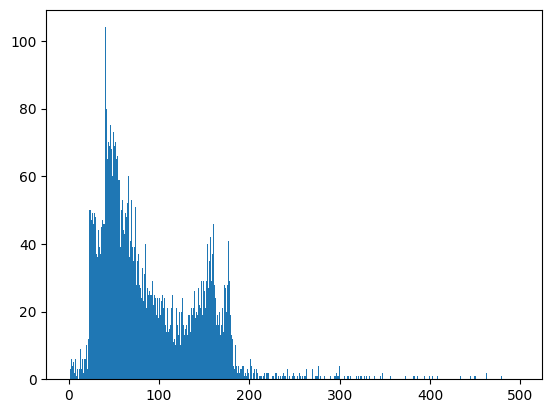

In [13]:
list1 = [len(x) for x in  df['text']]
plt.hist(list1, range(500))
plt.show()

In [14]:

df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_characters'] = df['text'].apply(len)


print(df[['text', 'num_words', 'num_characters']].head())

                                                text  num_words  \
0  Go until jurong point, crazy.. Available only ...         20   
1                      Ok lar... Joking wif u oni...          6   
2  Free entry in 2 a wkly comp to win FA Cup fina...         29   
3  U dun say so early hor... U c already then say...         12   
4  Nah I don't think he goes to usf, he lives aro...         14   

   num_characters  
0             111  
1              29  
2             173  
3              67  
4              79  


In [15]:
max_length = int(df['num_words'].quantile(0.95))
print(f'Suggested max_length for tokenization: {max_length}')

Suggested max_length for tokenization: 33


In [29]:
def preprocess_text(text):
  text = re.sub(r'\d+', '', text)  # Remove digits
  text = re.sub('https?://\S+|www\.\S+', '', text)  # remove URL
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  tokens = nltk.word_tokenize(text)  # Tokenize text
  text = re.sub('\[.*?\]', '', text)
  return ' '.join(tokens)



df['Cleaned Text'] = df['text'].apply(preprocess_text)

In [41]:
df.tail()

,text,label,num_words,num_characters,cleaned_text
5567,This is the 2nd time we have tried 2 contact u...,spam,31,179,time tri contact u. u å£ pound prize. claim ea...
5568,Will Ì_ b going to esplanade fr home?,ham,8,37,ì_ b go esplanad fr home?
5569,"Pity, * was in mood for that. So...any other s...",ham,11,75,"pity, * mood that. so...ani suggestions? https..."
5570,The guy did some bitching but I acted like i'd...,ham,26,125,guy bitch act like i'd interest buy someth els...
5571,Rofl. Its true to its name,ham,6,26,rofl. true name


In [30]:
df.head()

,text,label,Cleaned Text,word_count
0,"Go until jurong point, crazy.. Available only ...",ham,Go until jurong point crazy Available only in ...,20
1,Ok lar... Joking wif u oni...,ham,Ok lar Joking wif u oni,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in a wkly comp to win FA Cup final ...,29
3,U dun say so early hor... U c already then say...,ham,U dun say so early hor U c already then say,12
4,"Nah I don't think he goes to usf, he lives aro...",ham,Nah I dont think he goes to usf he lives aroun...,14


In [31]:
print(df['Cleaned Text'][5])

FreeMsg Hey there darling its been weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send å to rcv


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

X = count_vectorizer.fit_transform(df['Cleaned Text'])

words = count_vectorizer.get_feature_names_out()

word_counts = X.sum(axis=0).A1

word_counts_df = pd.DataFrame({'Word': words, 'Count': word_counts})
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

print(word_counts_df)

plt.figure(figsize=(12, 8))
plt.bar(word_counts_df['Word'].head(20), word_counts_df['Count'].head(20), color='skyblue')
plt.title('Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [16]:
# Define word count range
min_length = 3  # Minimum number of words
max_length = 197  # Maximum number of words

# Filter the DataFrame
df = df[(df['num_words'] >= min_length) & (df['num_words'] <= max_length)]

In [17]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Initialize stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean_text(text, use_stemming=True):


    # make text lowercase
    text = str(text).lower()

    # remove extra whitespaces
    text = re.sub('\n', '', text)

    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    # return cleaned text
    return text

In [19]:
df['cleaned_text'] = df['text'].apply(clean_text)

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])


sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_length = 197

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [22]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


encoded_labels = label_encoder.fit_transform(df['label'])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)


print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

Training data shape: (4409, 197), Training labels shape: (4409,)
Testing data shape: (1103, 197), Testing labels shape: (1103,)


# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [27]:

vocab_size = len(tokenizer.word_index) + 1
embedding_size = 100
max_length = 197
num_classes = len(label_encoder.classes_)


model = Sequential()


model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_length))


model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(units=32)))


model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 42s 246ms/step - accuracy: 0.9002 - loss: 0.2421 - val_accuracy: 0.9791 - val_loss: 0.0722
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.9943 - loss: 0.0237 - val_accuracy: 0.9801 - val_loss: 0.0598
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 37s 264ms/step - accuracy: 0.9978 - loss: 0.0107 - val_accuracy: 0.9773 - val_loss: 0.0874
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 35s 222ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9773 - val_loss: 0.1121
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9773 - val_loss: 0.1039
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 39s 222ms/step - accuracy: 1.0000 - loss: 3.2968e-04 - val_accuracy: 0.9719 - val_loss: 0.0998
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 240ms/step - accuracy: 1.0000 - loss: 5.7211e-04 - val_accuracy: 0.9810 - val_loss: 0.1142
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 38s 216ms/step - accuracy: 0.9991 -

In [30]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9734 - loss: 0.1312
Test Accuracy: 0.9710


# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

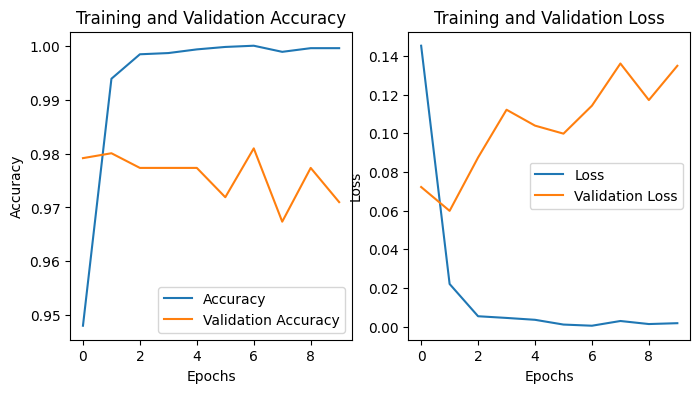

In [44]:
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [31]:
def preprocess_new_text(text):
    # Clean the text (reuse your cleaning function)
    cleaned_text = clean_text(text)  # Assuming clean_text function is defined as before
    # Tokenize the cleaned text
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    # Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    return padded_sequence

In [42]:
new_sample = "Rofl. Its true to its name"
padded_new_sample = preprocess_new_text(new_sample)

In [39]:
# Make a prediction
predictions = model.predict(padded_new_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [43]:
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
predicted_label = label_encoder.inverse_transform([predicted_class])
print(f'Predicted Class: {predicted_label[0]}')

Predicted Class: ham


# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here: